Optimal portfolio:  [0.39  0.    0.231 0.    0.189 0.    0.19 ]
Expected return, volatility and sharpe ratio:  [0.24727913 0.19843928 1.24611992]


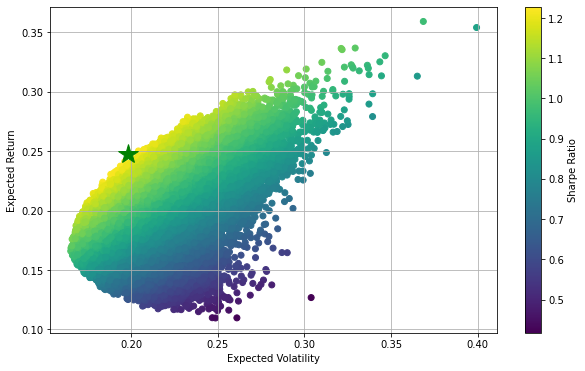

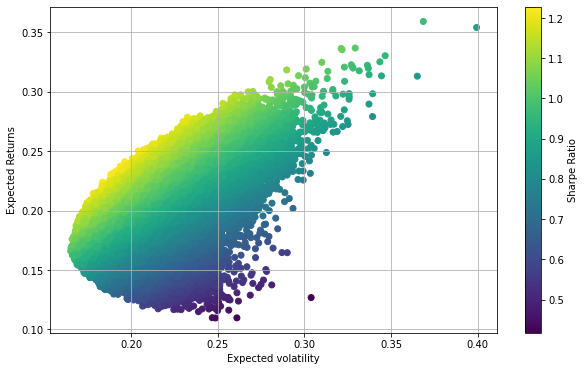

In [ ]:
import numpy as np 
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.optimize as optimization

NUM_TRADING_DAYS = 252

stocks = ['ABBOTINDIA.NS', 'M&M.NS', 'INFY.NS', 'ICICIBANK.NS', 'NESTLEIND.NS', 'INDIGO.NS', 'ADANIENT.NS']

NUM_PORTFOLIOS = 100000

start_date = '2015-01-01'
end_date = '2022-05-31'


#DOWNLOADING AND STORING DATA
def download_data():
	stock_data = {}

	for stock in stocks:
		ticker = yf.Ticker(stock)
		stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

	return pd.DataFrame(stock_data)


#SHOWING PRICE CHARTS FOR THE STOCKS
def show_data(data):
	data.plot(figsize = (10, 5))
	plt.show()


#DAILY RETURNS
def calculate_return(data):
	log_return = np.log(data/data.shift(1))
	return log_return[1:]


def show_statistics(returns):
	print(returns.mean() * NUM_TRADING_DAYS)
	print(returns.cov() * NUM_TRADING_DAYS)


def show_mean_variance(returns, weights):
	portfolio_return = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
	portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights)))
	print("Expected portfolio return: ", portfolio_return)
	print("Expected portfolio volatility: ", portfolio_volatility)


#SIMULATING PORTFOLIOS
def generate_portfolios(returns):
	portfolio_means = []
	portfolio_risks = []
	portfolio_weights = []

	for _ in range(NUM_PORTFOLIOS):
		w = np.random.random(len(stocks))
		w /= np.sum(w)
		portfolio_weights.append(w)
		portfolio_means.append(np.sum(returns.mean() * w) * NUM_TRADING_DAYS)
		portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(returns.cov() * NUM_TRADING_DAYS, w))))

	return np.array(portfolio_weights), np.array(portfolio_means), np.array(portfolio_risks)


#PLOTTING THE PORTFOLIOS
def show_portfolios(returns, volatilities):
	plt.figure(figsize = (10, 6))
	plt.scatter(volatilities, returns, c = returns/volatilities, marker = 'o')
	plt.grid(True)
	plt.xlabel('Expected volatility')
	plt.ylabel('Expected Returns')
	plt.colorbar(label = 'Sharpe Ratio')
	plt.show()


def statistics(weights, returns):
	portfolio_return = np.sum(returns.mean() * weights) * NUM_TRADING_DAYS
	portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * NUM_TRADING_DAYS, weights)))

	return np.array([portfolio_return, portfolio_volatility, portfolio_return / portfolio_volatility])


def min_function_sharpe(weights, returns):
	return -statistics(weights, returns)[2]


def optimize_portfolio(weights, returns):
	constraints = {'type':'eq', 'fun':lambda x: np.sum(x) - 1}

	bounds = tuple((0, 1) for _ in range(len(stocks)))

	return optimization.minimize(fun = min_function_sharpe, x0 = weights[0], args = returns, method = 'SLSQP', bounds = bounds, constraints = constraints)


def print_optimal_portfolio(optimum, returns):
	print("Optimal portfolio: ", optimum['x'].round(3))
	print("Expected return, volatility and sharpe ratio: ", statistics(optimum['x'].round(3), returns))


def show_optimal_portfolio(opt, rets, portfolio_rets, portfolio_vols):
	plt.figure(figsize = (10, 6))
	plt.scatter(portfolio_vols, portfolio_rets, c = portfolio_rets / portfolio_vols, marker = 'o')
	plt.grid(True)
	plt.xlabel("Expected Volatility")
	plt.ylabel("Expected Return")
	plt.colorbar(label = "Sharpe Ratio")
	plt.plot(statistics(opt['x'], rets)[1], statistics(opt['x'], rets)[0], 'g*', markersize = 20.0)



if __name__ == '__main__':
	data = download_data()
	log_daily_returns = calculate_return(data)

	pweights, means, risks = generate_portfolios(log_daily_returns)

	optimum = optimize_portfolio(pweights, log_daily_returns)

	print_optimal_portfolio(optimum, log_daily_returns)

	show_optimal_portfolio(optimum, log_daily_returns, means, risks)

	show_portfolios(means, risks)

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
